In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
import script.data as data

In [2]:
ticker = '002768'

In [3]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)

In [4]:
change = income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']].pct_change(periods=-1).round(3) * 100
income_change = pd.concat([income[['截止日期', '归属于母公司所有者的净利润', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change

,截止日期,归属于母公司所有者的净利润,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
35657,2019-12-31,3.960264e+08,1.46,1.46,36.1,36.2,28.4
35658,2018-12-31,3.084610e+08,1.16,1.16,81.9,85.2,51.9
35660,2017-12-31,2.030643e+08,0.85,0.85,59.6,57.3,55.1
35662,2016-12-31,1.309143e+08,0.55,0.55,71.0,72.1,81.2
35664,2015-12-31,7.223752e+07,0.34,0.34,9.8,9.1,15.0
35666,2014-12-31,6.280719e+07,1.05,1.05,19.1,18.9,21.0
35669,2013-12-31,5.188607e+07,0.86,0.86,35.3,37.8,14.0
35671,2012-12-31,4.549588e+07,0.76,0.76,NaN,NaN,NaN


In [5]:
change = incomeq[['营业收入', '归属于母公司所有者的净利润']].pct_change(periods=-4).round(3) * 100
incomeq_change = pd.concat([incomeq[['截止日期', '营业收入', '归属于母公司所有者的净利润']], change], axis=1)
incomeq_change[:24]

,截止日期,营业收入,归属于母公司所有者的净利润,营业收入,归属于母公司所有者的净利润
61065,2020-06-30,2.382324e+09,4.319370e+08,111.0,389.4
61066,2020-03-31,1.154263e+09,1.018964e+08,28.2,28.2
61067,2019-12-31,2.012824e+09,1.450985e+08,45.5,36.2
61068,2019-09-30,1.027353e+09,8.317987e+07,11.3,6.9
61069,2019-06-30,1.129059e+09,8.825318e+07,35.4,28.4
61070,2019-03-31,9.001173e+08,7.949492e+07,54.1,43.6
61071,2018-12-31,1.383291e+09,1.065243e+08,105.7,54.6
61072,2018-09-30,9.227361e+08,7.782644e+07,62.6,36.2
61073,2018-06-30,8.341431e+08,6.875395e+07,76.0,59.4
61074,2018-03-31,5.840953e+08,5.535634e+07,75.4,63.4


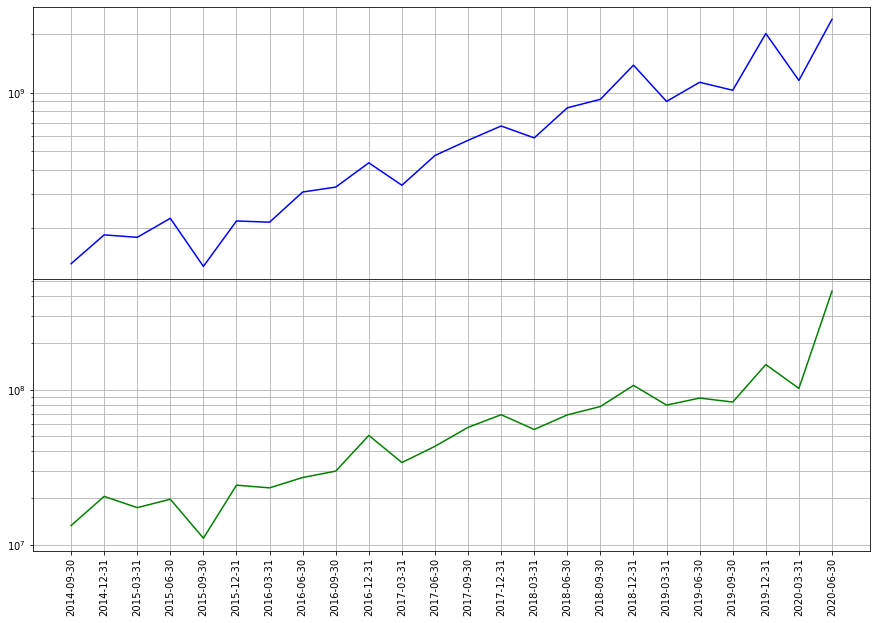

In [6]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [7]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,17.5,7.9
2018-12-31,17.6,8.4
2017-12-31,21.3,10.1
2016-12-31,19.0,10.2
2015-12-31,19.9,9.6
2014-12-31,19.6,9.2
2013-12-31,19.4,9.0
2012-12-31,21.7,10.7


In [8]:
df = data.get_market(ticker)
df['前复权'] = df['收盘价'] * df['累积前复权因子']
df.groupby(df['交易日期'].dt.year).agg(['min', 'max'])[-10:]

交易日期               收盘价           累积前复权因子              滚动市盈率  \
            min        max    min     max       min       max      min   
交易日期                                                                     
2015 2015-06-30 2015-12-31  25.16   68.42  0.327094  0.327094  28.4313   
2016 2016-01-04 2016-12-30  24.53  101.98  0.327094  0.983258  56.3704   
2017 2017-01-03 2017-12-29  20.15   28.47  0.983258  0.987333  30.3821   
2018 2018-01-02 2018-12-28  20.80   31.58  0.987333  0.992494  20.8303   
2019 2019-01-02 2019-12-31  19.75   34.79  0.992494  0.996992  17.0870   
2020 2020-01-02 2020-10-19  21.99   55.90  0.996992  1.000000  11.8735   

                      前复权             
           max        min        max  
交易日期                                  
2015   79.8791   8.229674  22.379742  
2016  122.9222  18.971427  39.359820  
2017   59.2659  19.894758  28.109367  
2018   38.6377  20.643872  31.342956  
2019   34.8407  19.601754  34.528862  
2020   42.4193  21.923845  55.731829